In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
%matplotlib inline
#%config InlineBackend.figure_format = 'svg' 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import dtreeviz
import imodelsx.process_results
from sklearn.tree import plot_tree
import sys
import numpy as np
import viz
import llm_tree.data
import imodelsx
import sklearn.tree
sys.path.append('../experiments/')
results_dir = '/home/chansingh/mntv1/tree-prompt/mar18'

r = imodelsx.process_results.get_results_df(results_dir, use_cached=True)

In [2]:
r.dataset_name.unique()

array(['financial_phrasebank', 'sst2', 'imdb', 'rotten_tomatoes',
       'emotion'], dtype=object)

In [3]:
# select a single model
rd = r
rd = rd[rd.dataset_name == 'rotten_tomatoes']
rd = rd[rd.model_name == 'manual_tree']
rd = rd[rd.checkpoint == 'EleutherAI/gpt-j-6B']
rd = rd[rd.verbalizer_num == 0]
rd = rd[rd.prompt_source == 'manual']
rd = rd[rd.num_prompts == 10]
display(rd.head())
run_args = rd.iloc[0]
model_name = run_args.model_name

,dataset_name,seed,save_dir,model_name,split_strategy,max_depth,num_prompts,checkpoint,checkpoint_prompting,verbalizer_num,...,feature_names,precision_train,recall_train,brier_score_loss_train,precision_cv,recall_cv,brier_score_loss_cv,precision_test,recall_test,brier_score_loss_test
894,rotten_tomatoes,1,/home/chansingh/mntv1/tree-prompt/mar18,manual_tree,iprompt,2,10,EleutherAI/gpt-j-6B,EleutherAI/gpt-j-6B,0,...,"[ The soundtrack of the movie was, The action...",0.785595,0.820217,0.140995,0.790922,0.817923,0.138886,0.760684,0.834897,0.145262


### Load an individual model

acc 0.7861163227016885 depth 2 dset rotten_tomatoes


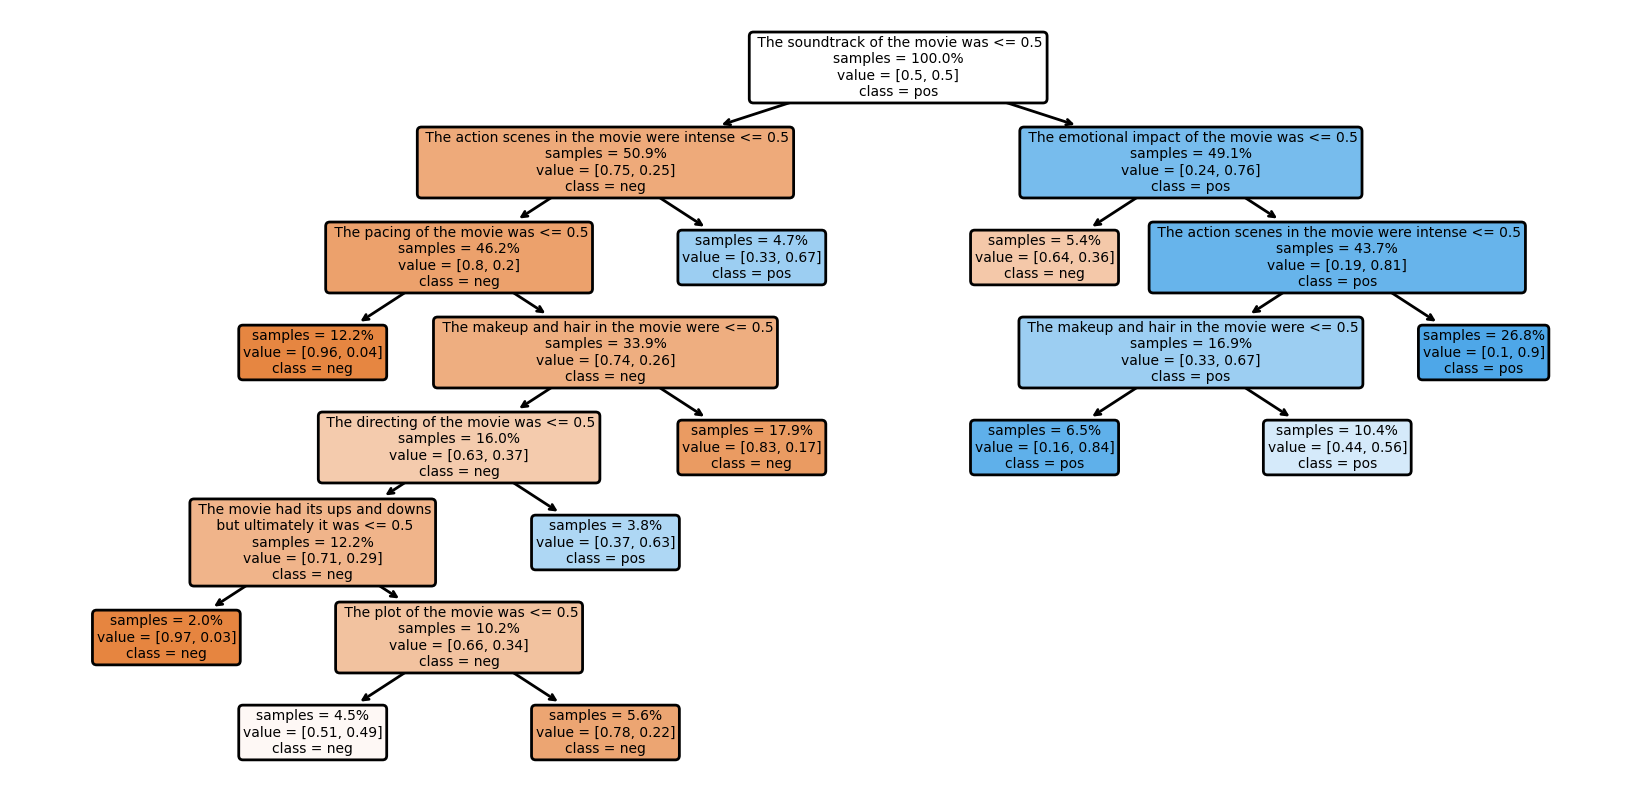

In [4]:
print('acc', run_args.accuracy_test, 'depth', run_args.max_depth, 'dset', run_args.dataset_name)
model = pkl.load(open(join(run_args.save_dir_unique, 'model.pkl'), 'rb'))

dt = model
feature_names = run_args.feature_names
feat_names = ['\n'.join(n.split(',')) for n in feature_names]
plt.figure(figsize=(8.5, 4.25))
sklearn.tree.plot_tree(dt, feature_names=feat_names, class_names=['neg', 'pos'],
                        impurity=False,
                        precision=2, rounded=True, proportion=True, filled=True, fontsize=5)
plt.savefig('tree_rt.pdf')
plt.show()

In [5]:
import pybaobabdt

In [24]:
dt.classes_ = [b'neg', b'pos']
def colors(x):
    if x == 0:
        return 'red'
    else:
        return 'blue'
ax = pybaobabdt.drawTree(dt, figsize=(20, 10), dpi=300, ratio=0.55,
features=feat_names, colormap=colors, custom_threshold=['neg', 'pos'])
plt.savefig('tree_rt_bao.pdf')